*** CMPE 140 WEEK 10 PS ***

# COMPOSITE PLOTS

Let's create enhanced plots with some data ...

First let's read the data .. Some quiz results

Read data from file "540-grades.csv"

Values are seperated by ","(comma) and file includes header

In [1]:
data <- read.table(
    "https://raw.githubusercontent.com/serhatcevikel/cmpe_140_public/master/grades.csv",
    sep=",",
    header=T)

In [2]:
head(data)

id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,QAll,P0,P1,P2,P3,P4,Pall,X0,M1
2014700045,1,4,5,5,3,5,4,0,0,0,3.86,0,19.0,0,0,0,8.7500000,0,90
2016700099,4,4,1,3,4,4,2,0,0,0,3.14,0,18.0,0,0,0,8.2894737,0,91
2016700111,0,6,1,5,3,4,3,0,0,0,3.14,0,0.5,0,0,0,0.2302632,0,66
2015800018,2,2,5,3,0,4,0,0,0,0,2.29,0,8.0,0,0,0,3.6842105,0,55
2015800039,3,2,0,0,0,0,0,0,0,0,0.71,0,0.0,0,0,0,0.0000000,0,46
2015700033,2,4,5,5,3,4,3,0,0,0,3.71,0,13.0,0,0,0,5.9868421,0,92


You are supposed to perform the following tasks:
- Divide the screen into 14 grids: 2 rows and 7 columns
- Top row: draw quiz scores of people (Up to quiz 7, one plot for each quiz)
- Color of people with M1 score larger than 70 should be red
- Color of people with M1 score smaller than 70 should be blue
- Bottom row, columns 1-6: draw histograms of QAll
- With increasing detail (More bins)
- Give title to each histogram


To format the plot "canvas", we will use the "par" function:

par {graphics}

Set or Query Graphical Parameters

par can be used to set or query graphical parameters.

Parameters can be set by specifying them as arguments to par in tag = value form, or by passing them as a list of tagged values.

Before the tasks, we are given the following line to format the margins of the plots with the "mar" argument to "par" function:

mar

A numerical vector of the form c(bottom, left, top, right) which gives the number of lines of margin to be specified on the four sides of the plot.

The default is c(5, 4, 4, 2) + 0.1.

In [3]:
par(mar=c(1.5,1.5,2.5,2.5))

Now, let's divide the screen into 14 grids in row major order (first left then down) using "mfrow" argument to "par":

mfcol, mfrow

A vector of the form c(nr, nc).

Subsequent figures will be drawn in an nr-by-nc array on the device by columns (mfcol), or rows (mfrow), respectively.

In [4]:
par(mfrow=c(2,7))

Top row: draw quiz scores of people (Up to quiz 7, one plot for each quiz)

Color of people with M1 score larger than 70 should be red

Color of people with M1 score smaller than 70 should be blue

Check the colnames:

In [5]:
names(data)
dim(data)

[1] "id"   "Q1"   "Q2"   "Q3"   "Q4"   "Q5"   "Q6"   "Q7"   "Q8"   "Q9"  
[11] "Q10"  "QAll" "P0"   "P1"   "P2"   "P3"   "P4"   "Pall" "X0"   "M1"

[1] 42 20

See that quizes start from the second column. So first quiz stands on the second column and so on

For example the plot the first quiz (without coloring):

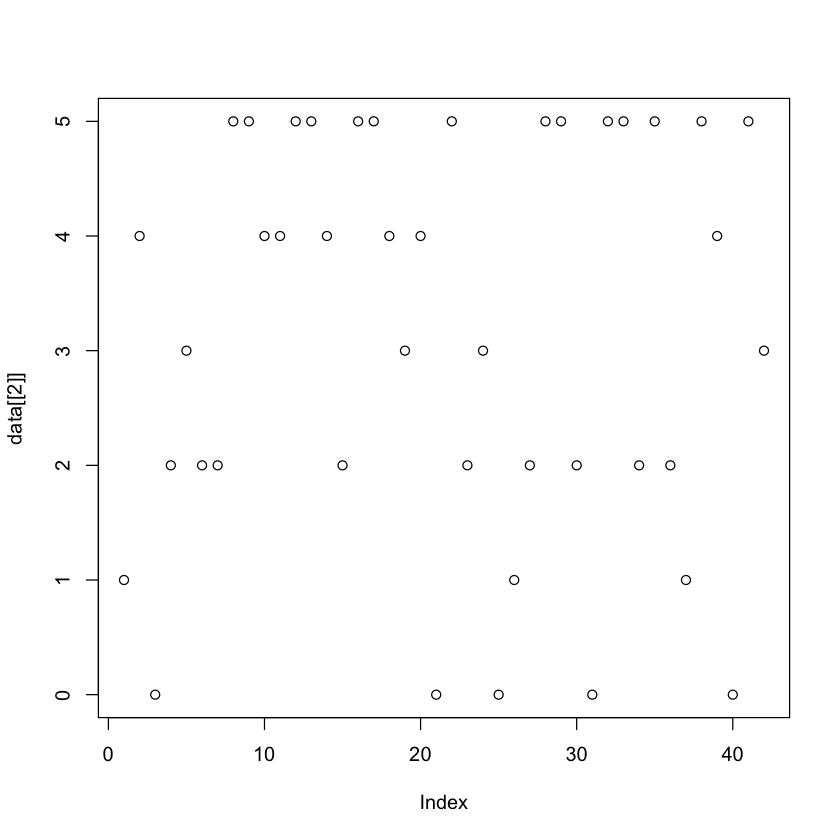

In [6]:
plot(data[[2]])
# alternatively, call by the name of the column:
# plot(data$Q1)

But we need a coloring scheme:

M1 score larger than 70 should be red

M1 score smaller than 70 should be blue:

In [7]:
ifelse(data$M1>70,"red","blue")

[1] "red"  "red"  "blue" "blue" "blue" "red"  "blue" "blue" "red"  "red" 
[11] "red"  "blue" "red"  "blue" "red"  "blue" "red"  "red"  "blue" "blue"
[21] "blue" "red"  "blue" "red"  "red"  "blue" "blue" "red"  "blue" "blue"
[31] "blue" "blue" "red"  "blue" "red"  "blue" "blue" "blue" "blue" "blue"
[41] "red"  "blue"

Now let's pass the coloring scheme via "col" argument to "plot" function

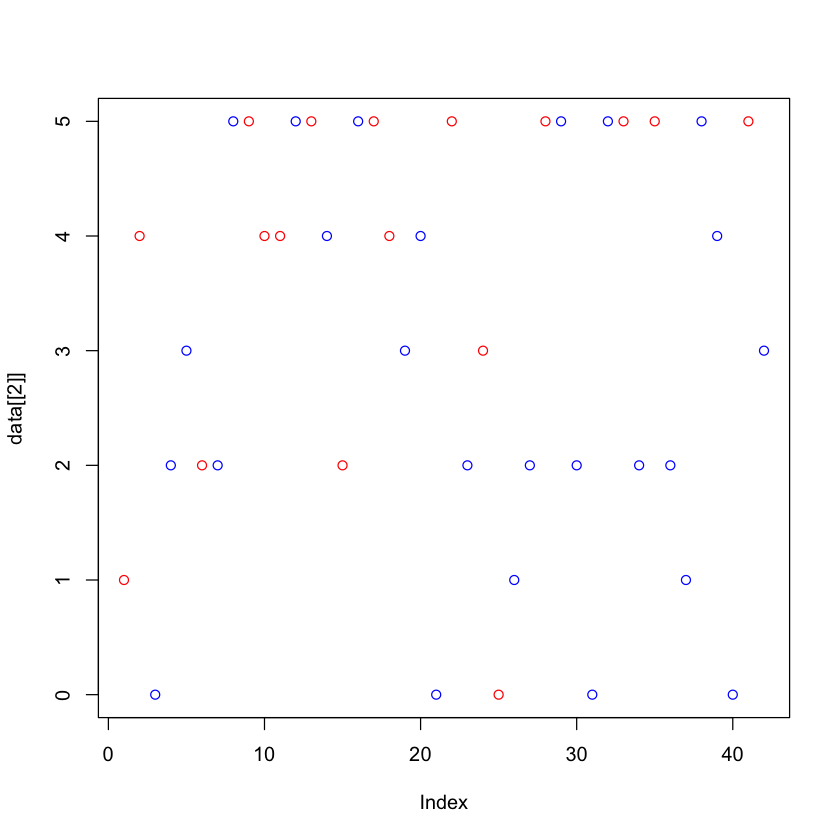

In [8]:
plot(data[[2]],col=ifelse(data$M1>70,"red","blue"))

But we should plot the first 7 quizzes. Let's put all of them into a loop:

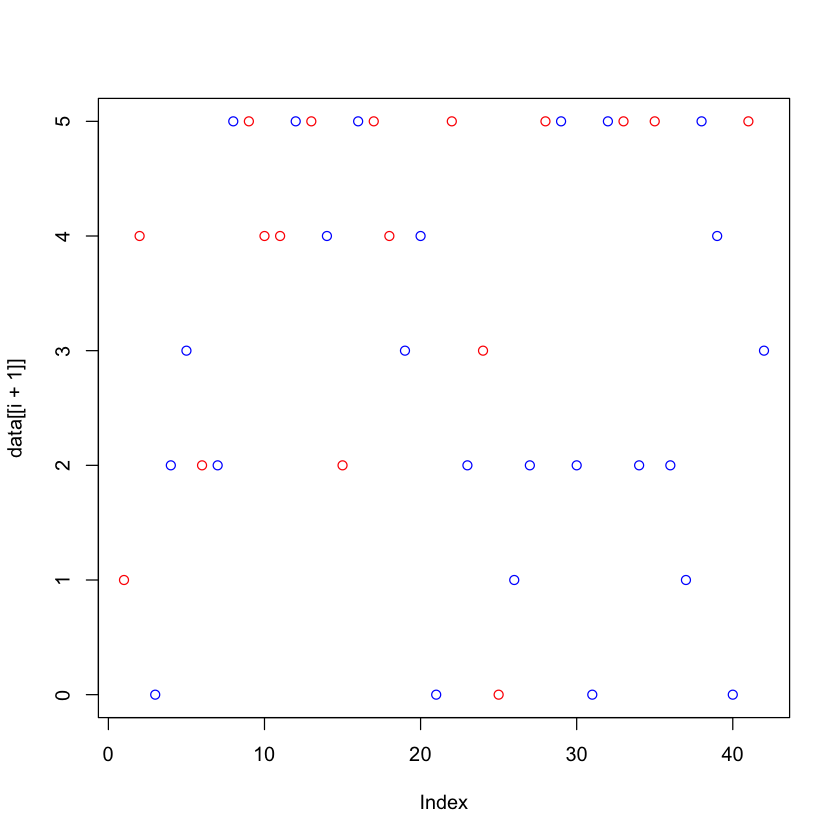

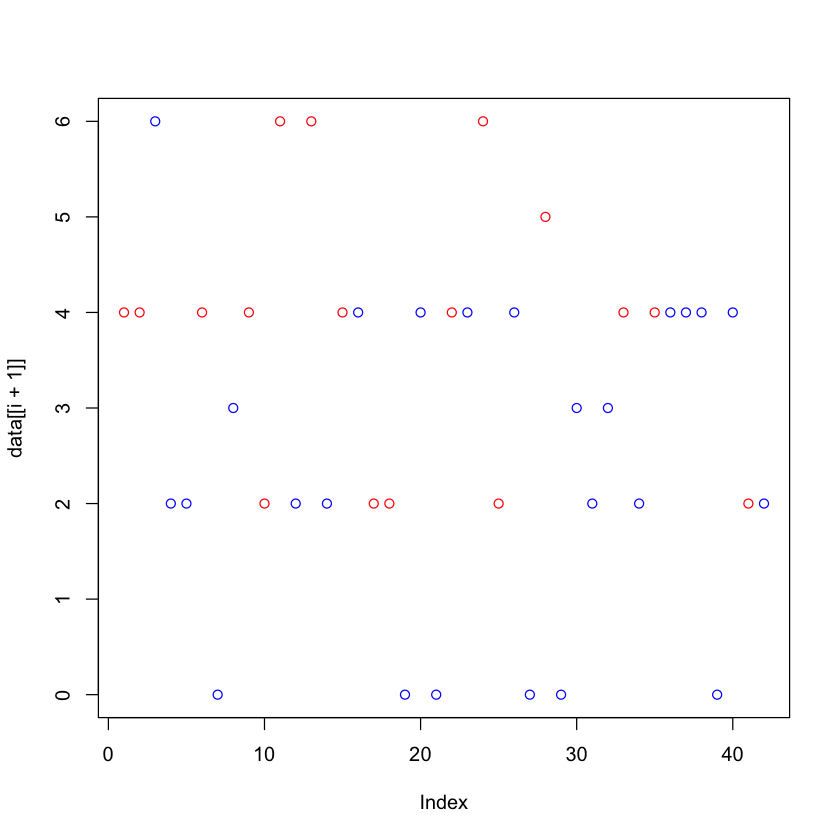

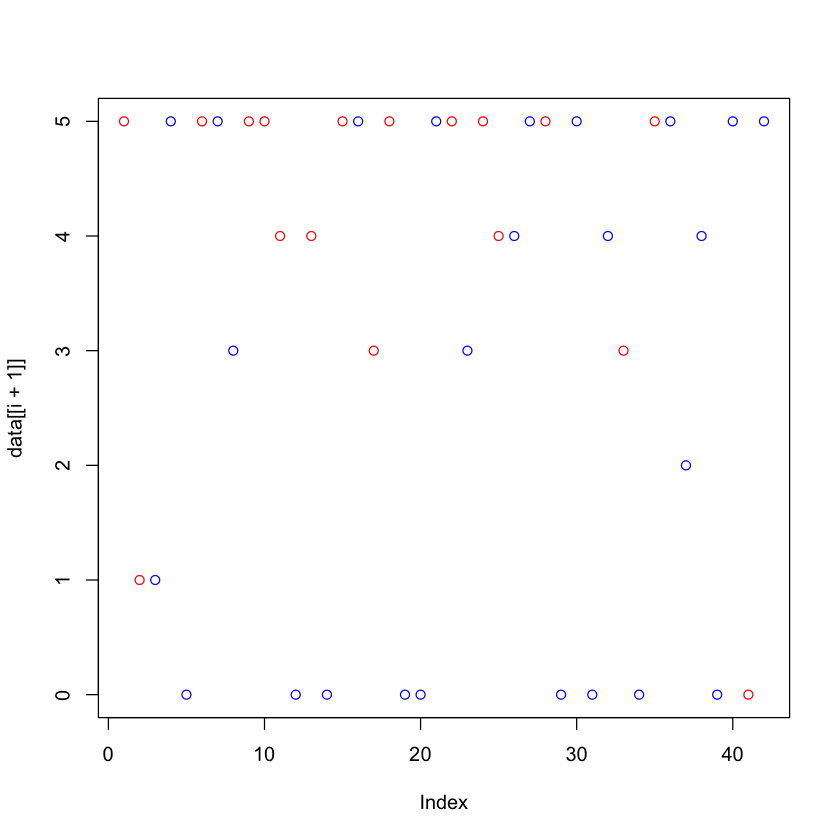

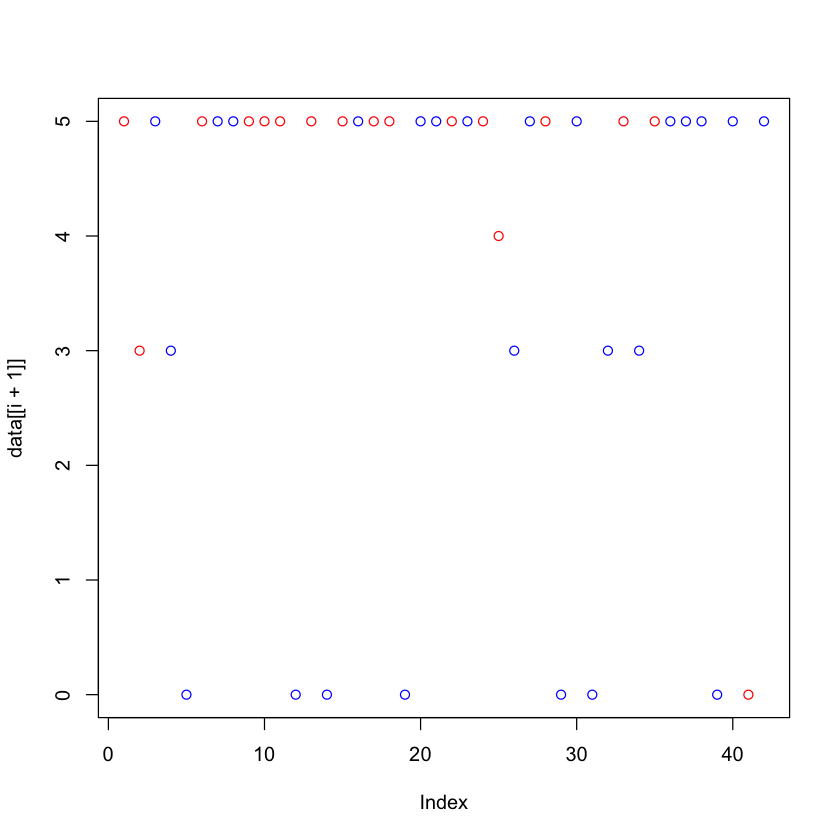

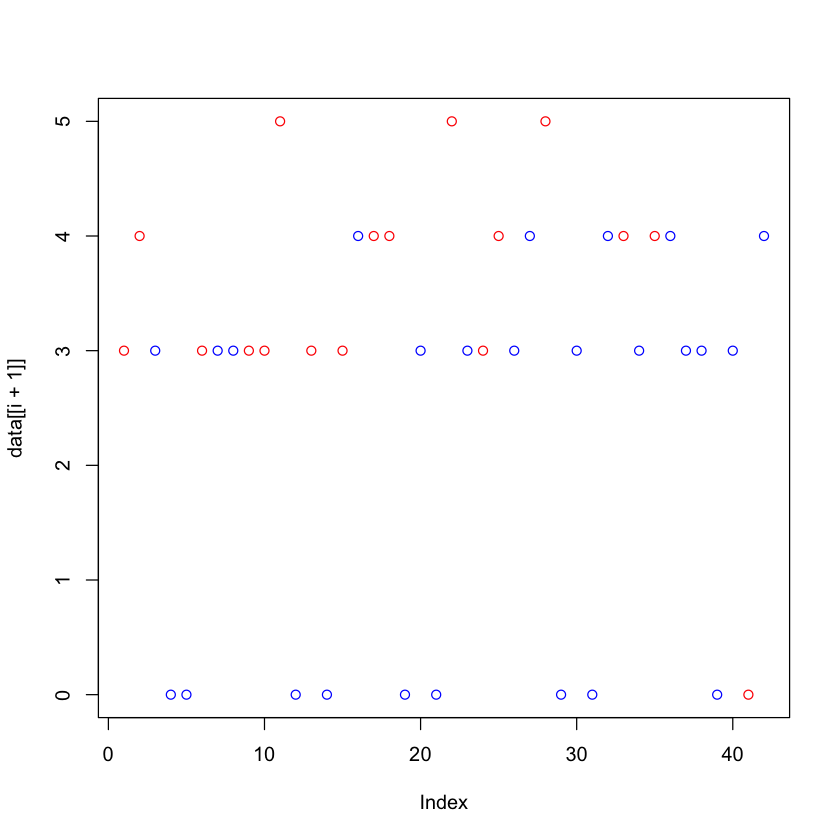

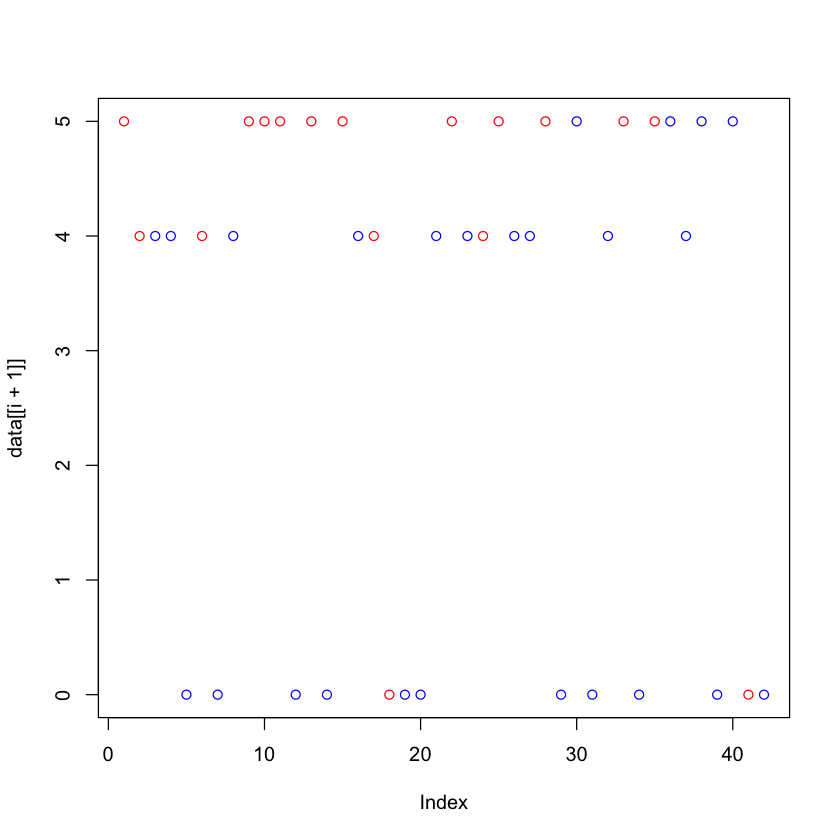

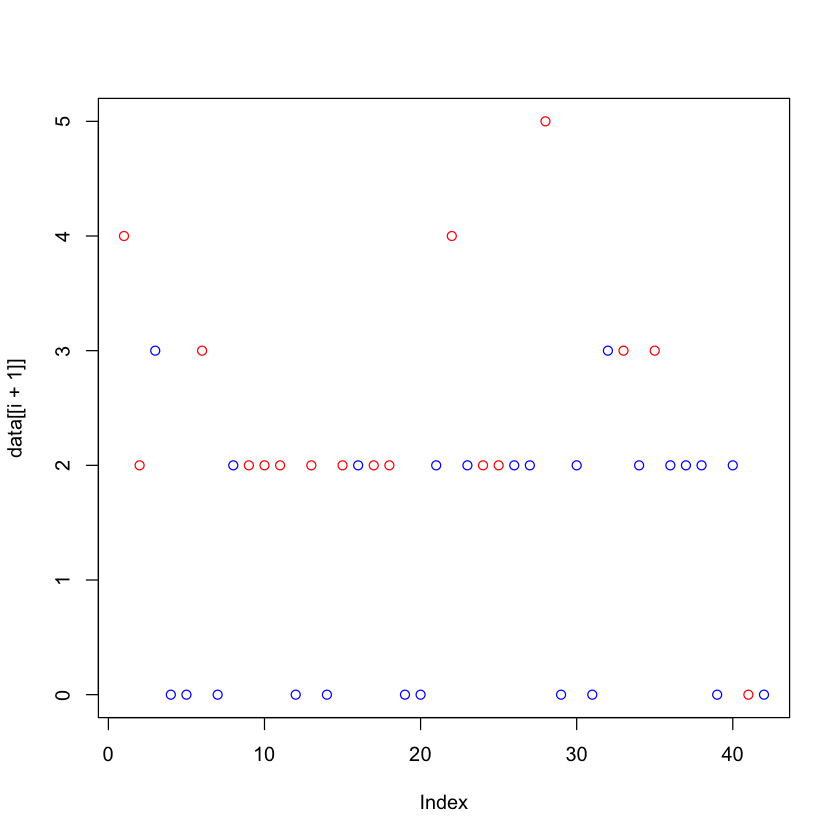

In [9]:
for (i in c(1:7)){
  plot(data[[i+1]],col=ifelse(data$M1>70,"red","blue"))
}

Let's combine them:

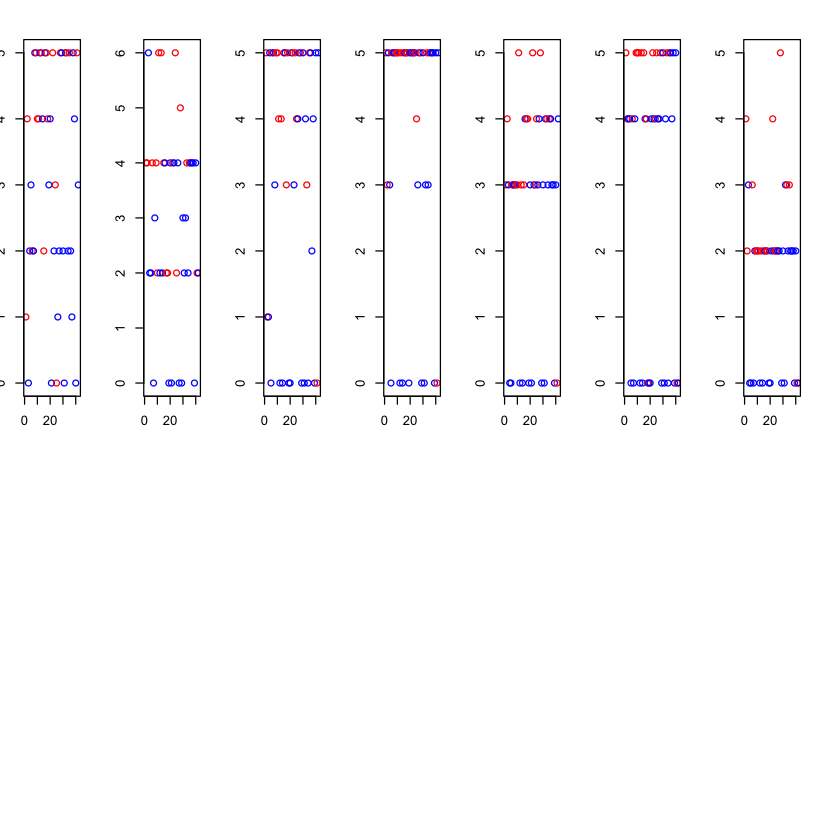

In [10]:
par(mar=c(1.5,1.5,2.5,2.5))

par(mfrow=c(2,7))

for (i in c(1:7)){
  plot(data[[i+1]],col=ifelse(data$M1>70,"red","blue"))
}

Now, the second row:

bottom row, columns 1-6: draw histograms of QAll

with increasing detail (More bins)

give title to each histogram


Let's make the bins start with 4 categories, upto 14

You can pass the "main" title of the histogram with the "main" argument

Let's make the main title as such "xxx bins"

First the 4 bin version:



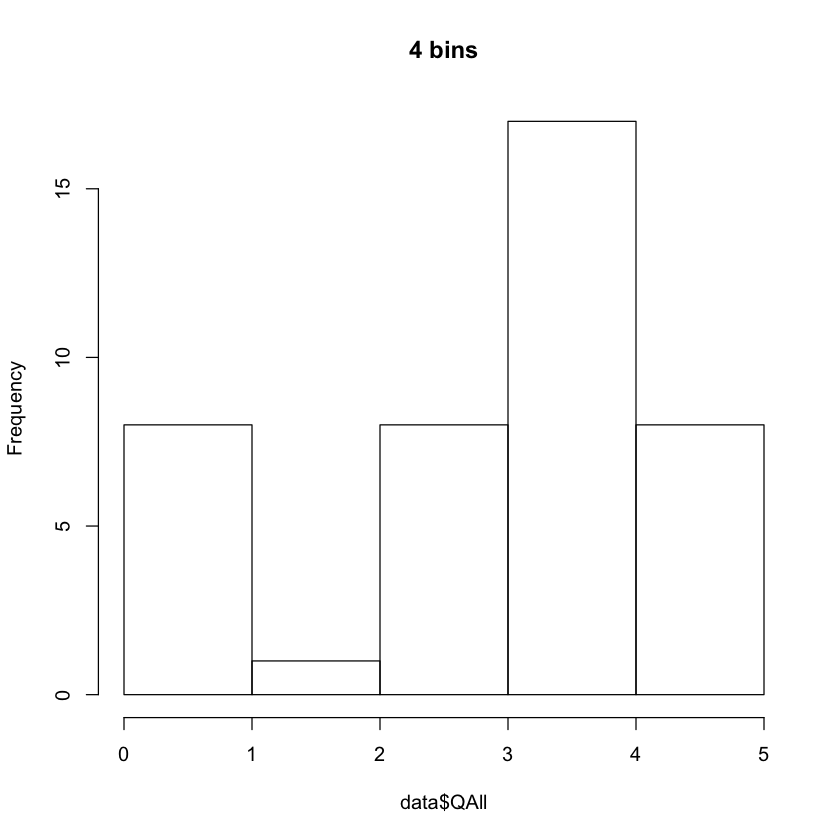

In [11]:
hist(data$QAll,breaks = 4, main = paste(4,"bins"))

And let's put it into a loop for number of bins:

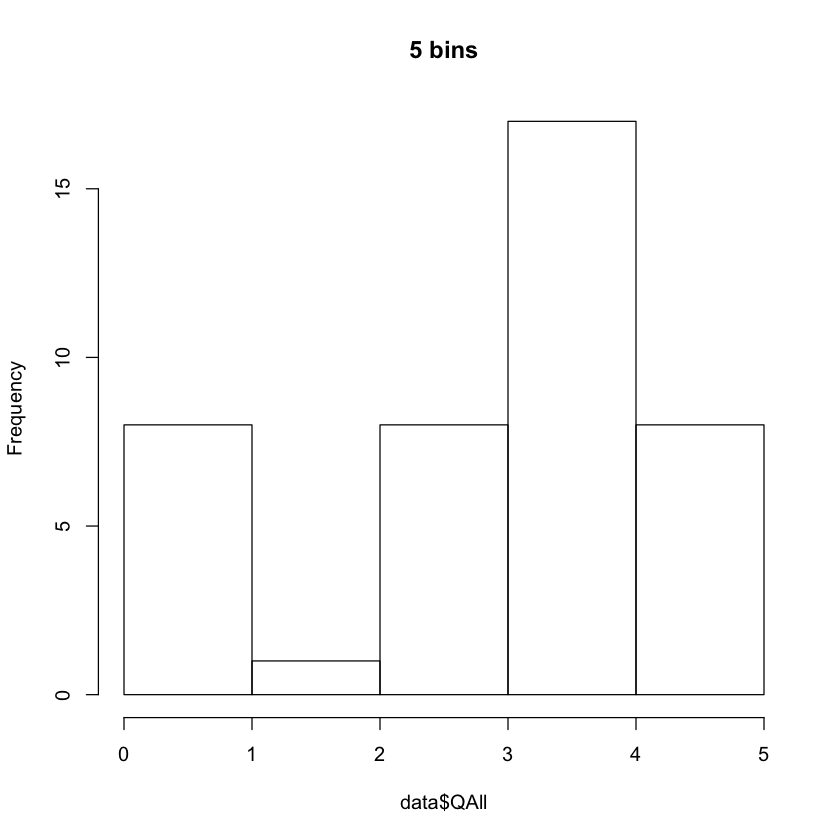

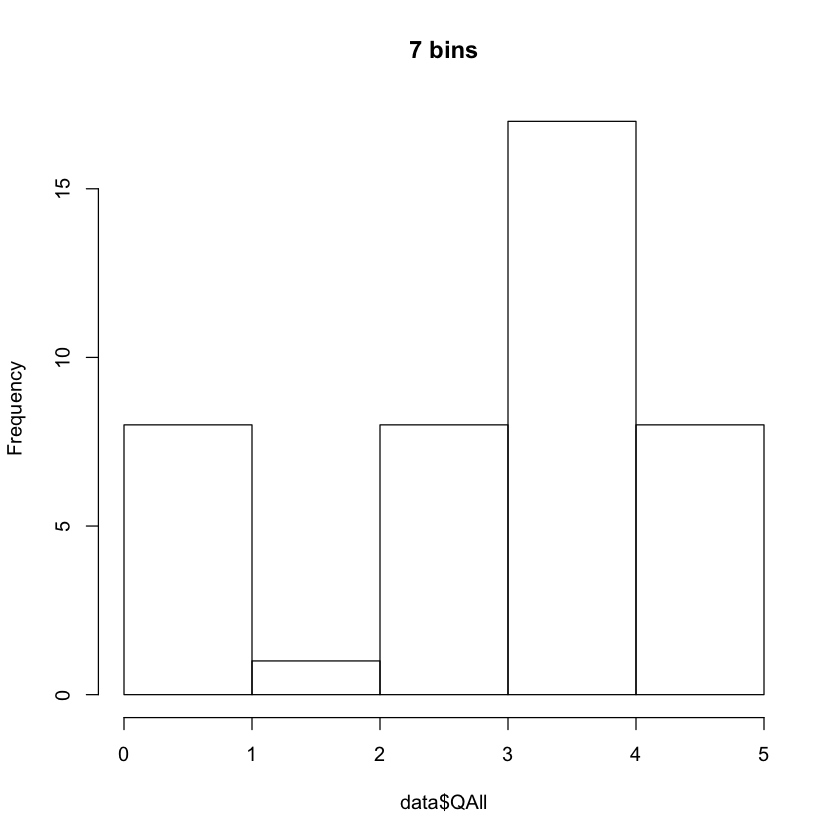

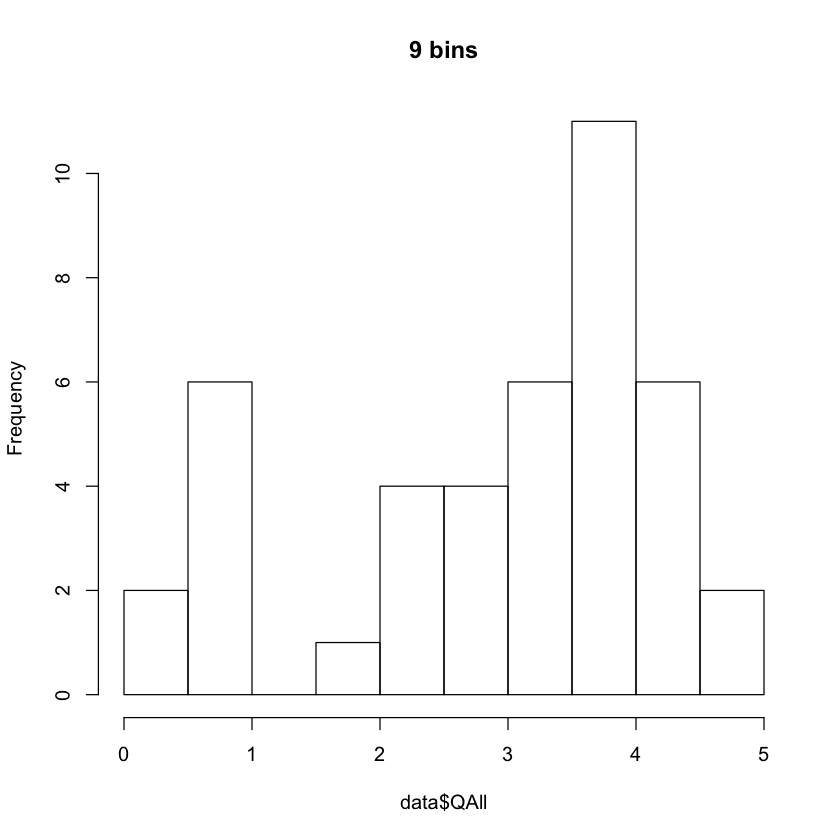

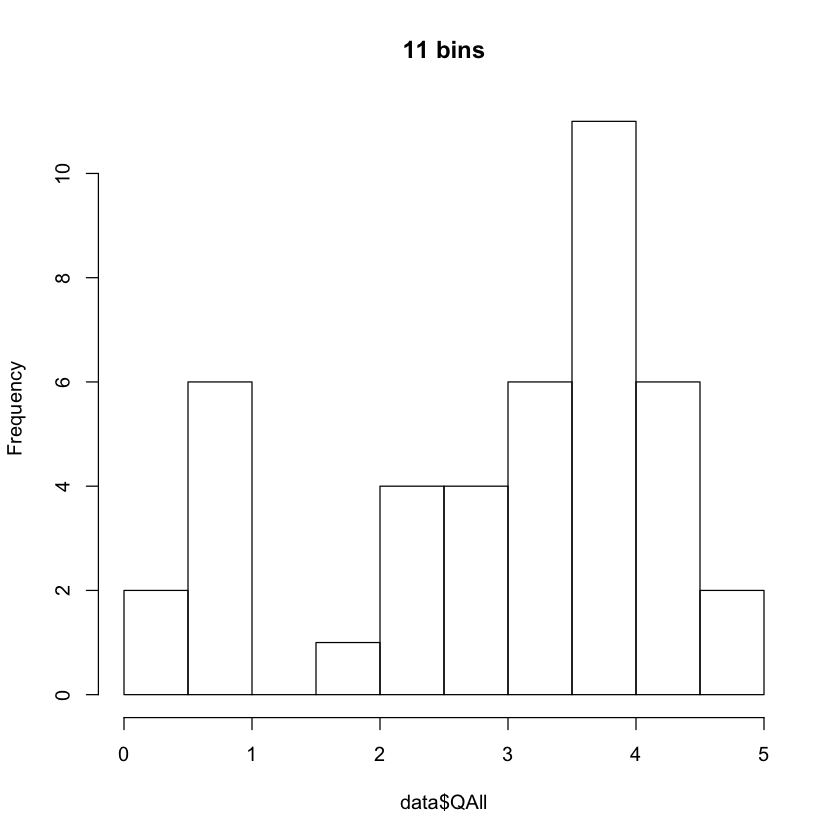

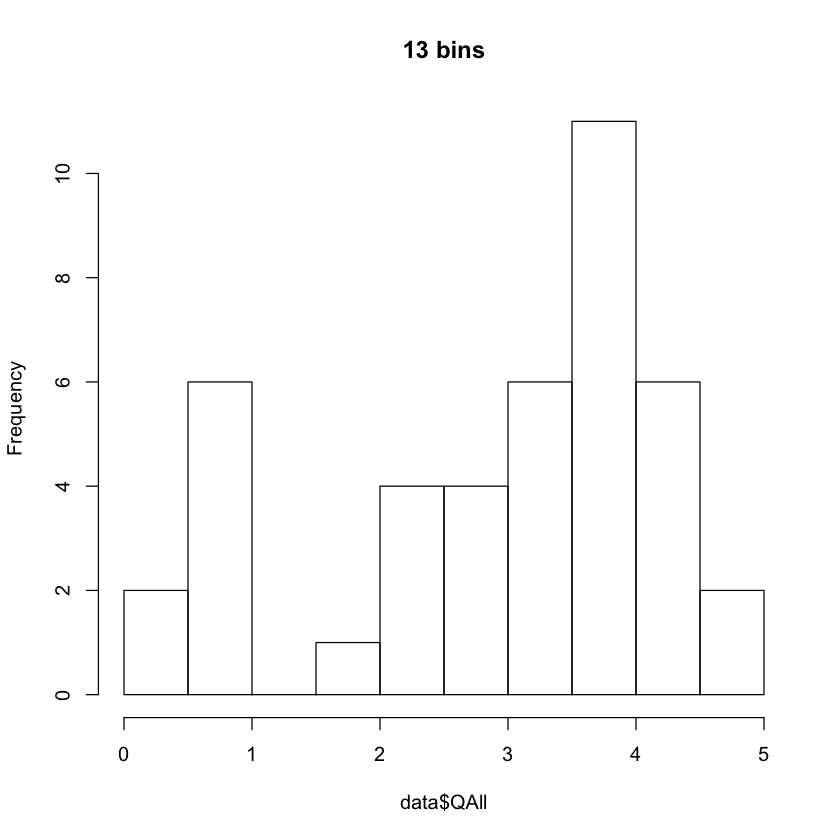

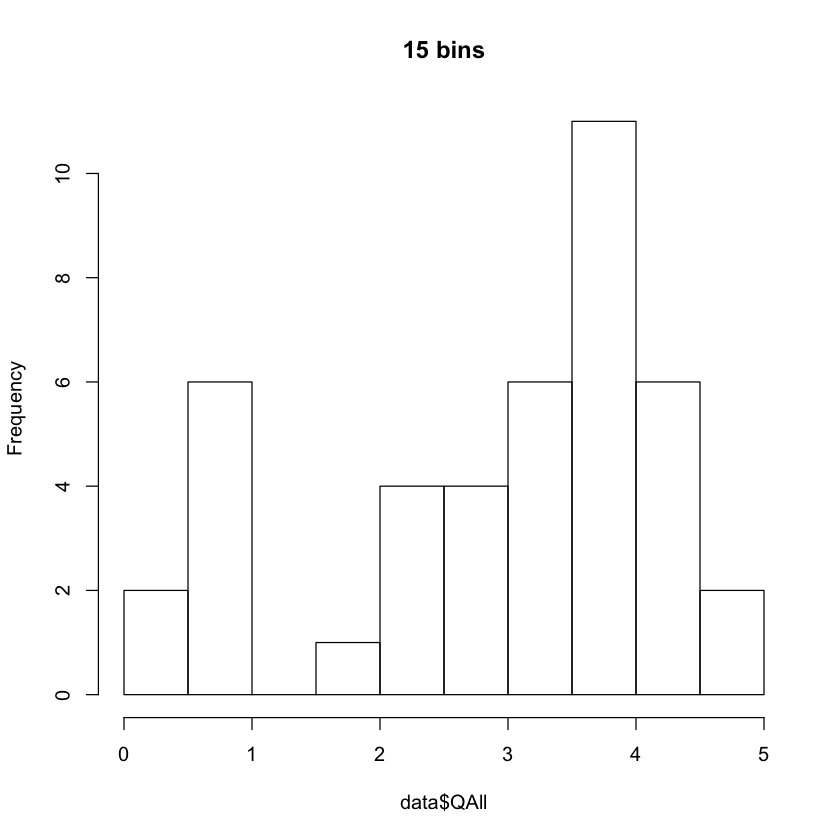

In [12]:
for (i in c(2:7)){
  hist(data$QAll,breaks=i*2,main=paste(i*2+1,"bins"))
}

Let's combine them:

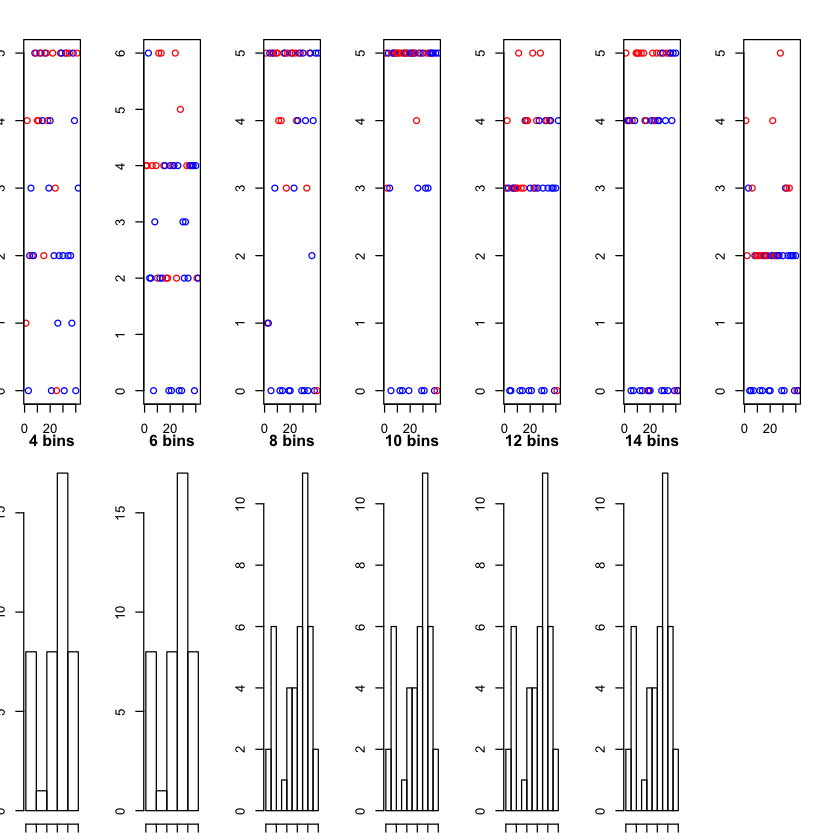

In [13]:
par(mar=c(1,1.5,2.5,2.5))

par(mfrow=c(2,7))

for (i in c(1:7)){
  plot(data[[i+1]],col=ifelse(data$M1>70,"red","blue"))
}

for (i in c(2:7)){
  hist(data$QAll,breaks=i*2,main=paste(i*2,"bins"))
}

Now the last part:

bottom row, last column: draw a pie chart that shows the ratio of

number of quizes, midterms and projects


Check the names again:

In [14]:
names(data)

[1] "id"   "Q1"   "Q2"   "Q3"   "Q4"   "Q5"   "Q6"   "Q7"   "Q8"   "Q9"  
[11] "Q10"  "QAll" "P0"   "P1"   "P2"   "P3"   "P4"   "Pall" "X0"   "M1"

Mx denotes midterms, Qx denotes quizzes and Px denotes projects

So there are 10 quizzes, 4 projects and one midterm:

In [15]:
newD <- c(quizes = 10, projects = 4, midterms = 1)
newD

quizes projects midterms 
      10        4        1

And draw the pie chart:

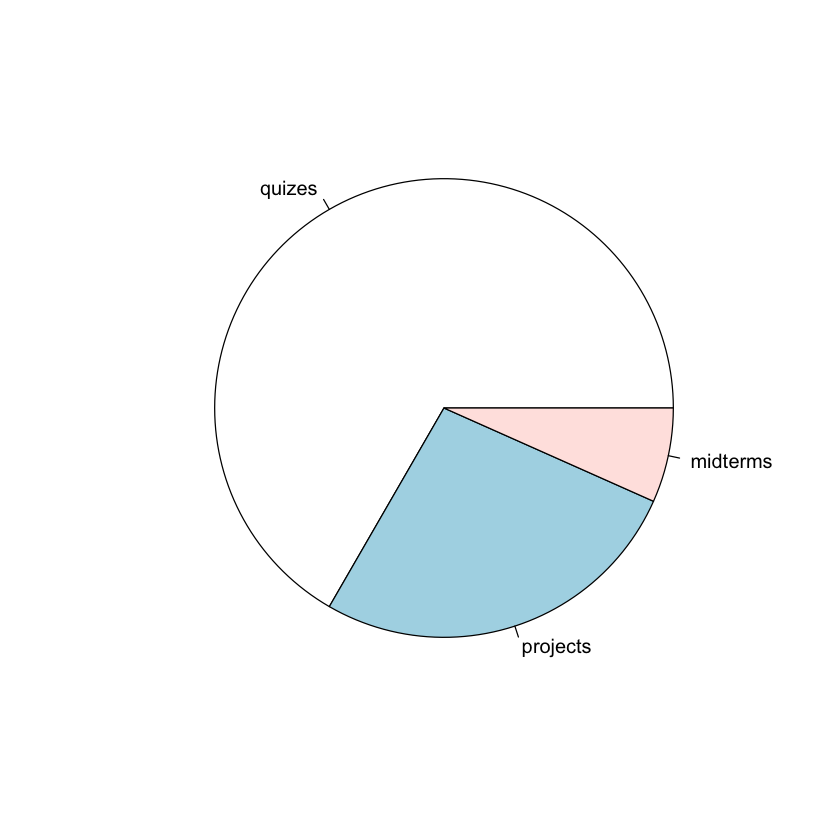

In [16]:
pie(newD)

Let's put them all together (and don't forget to reset the mfrow argument of par to c(1,1) ):

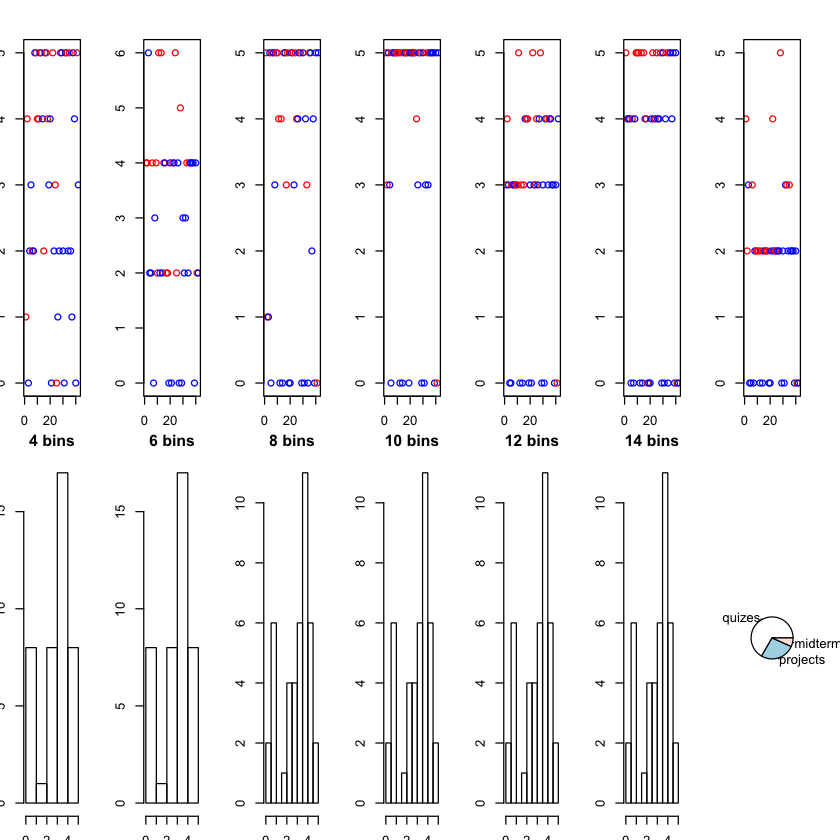

In [17]:
par(mar=c(1.5,1.5,2.5,2.5))

par(mfrow=c(2,7))

for (i in c(1:7)){
  plot(data[[i+1]],col=ifelse(data$M1>70,"red","blue"))
}

for (i in c(2:7)){
  hist(data$QAll,breaks=i*2,main=paste(i*2,"bins"))
}

newD <- c(quizes = 10, projects = 4, midterms = 1)

pie(newD)

par(mfrow=c(1,1))

# BOX PLOTS

First create a data frame of standart normal distributed random numbers:
- First column including both negative and positive numbers
- Second column including just positive numbers

In [18]:
rnumbers <- data.frame(rnorm1000 = rnorm(1000),
                      pos_rnorm1000 = abs(rnorm(1000)))
head(rnumbers)

rnorm1000,pos_rnorm1000
-0.197382820,2.4044474
-0.008383844,1.3605999
-0.071045327,0.9469605
-0.248912743,2.6190314
1.268065865,0.4149329
-0.591625782,0.4158184


Get structure and summary info

In [19]:
str(rnumbers)

'data.frame':	1000 obs. of  2 variables:
 $ rnorm1000    : num  -0.19738 -0.00838 -0.07105 -0.24891 1.26807 ...
 $ pos_rnorm1000: num  2.404 1.361 0.947 2.619 0.415 ...


In [20]:
summary(rnumbers)

   rnorm1000         pos_rnorm1000    
 Min.   :-3.326669   Min.   :0.00518  
 1st Qu.:-0.703004   1st Qu.:0.32261  
 Median : 0.018388   Median :0.66164  
 Mean   : 0.002892   Mean   :0.81458  
 3rd Qu.: 0.707472   3rd Qu.:1.17414  
 Max.   : 2.854610   Max.   :3.64310  

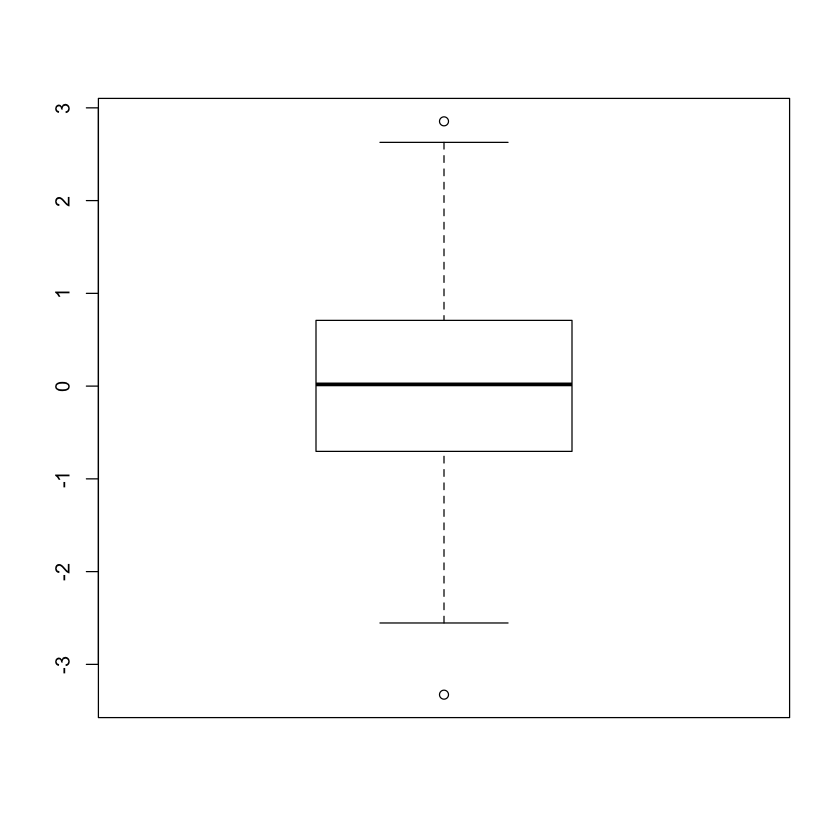

In [21]:
boxplot(rnumbers$rnorm1000)

See that lower and upper bounds of the box correspond to 1st and 3rd quartiles.

The bold line in the middle is the median 

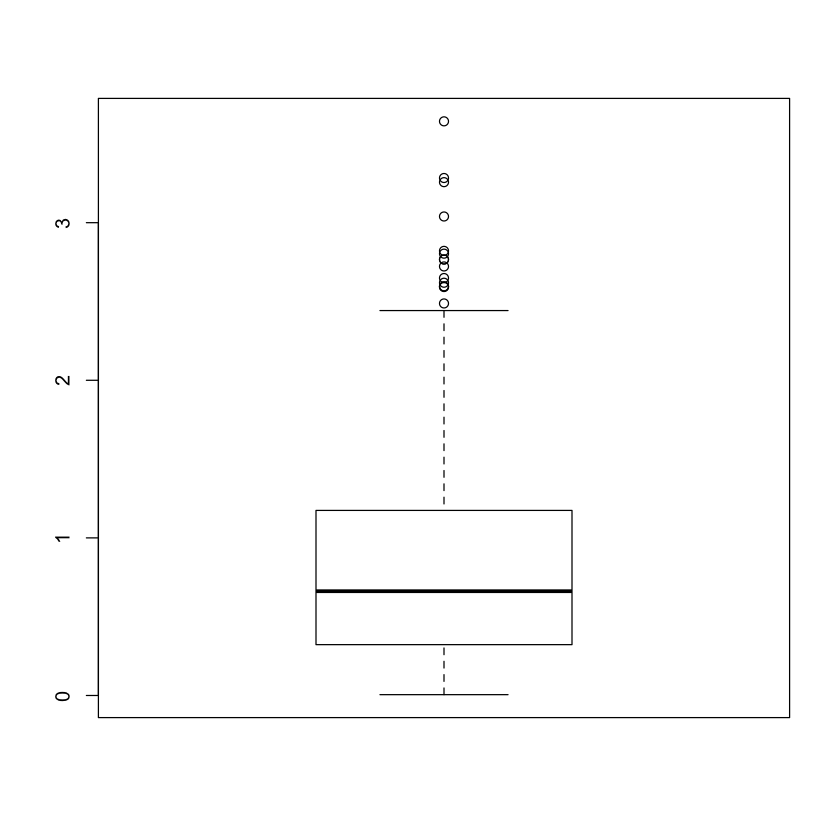

In [22]:
boxplot(rnumbers$pos_rnorm1000)

Let's combine them into a single plot:

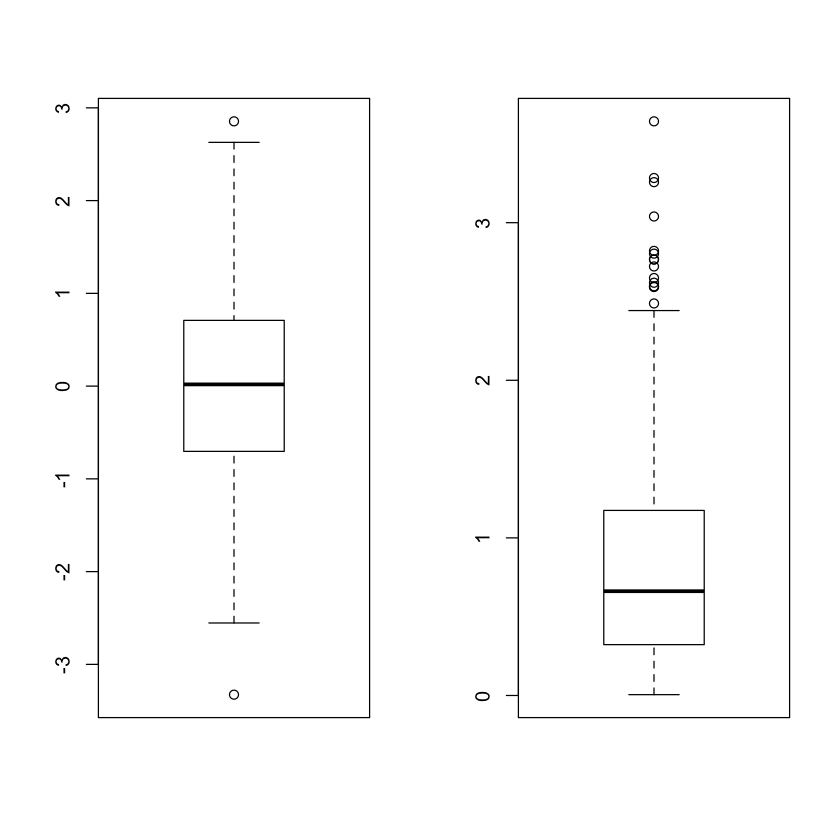

In [23]:
par(mfrow = c(1,2))
boxplot(rnumbers$rnorm1000)
boxplot(rnumbers$pos_rnorm1000)
par(mfrow = c(1,1))

See, that the x axes have different scales. We should coerce both x axes to the same scale

First get the min and max values of both

In [24]:
rangex <- sapply(rnumbers, function(x) c(min(x), max(x)))
rangex

rnorm1000,pos_rnorm1000
-3.326669,0.005179559
2.854610,3.643100337


A range of -4,+4 will suffice

We pass the limits of y axis with "ylim" argument:

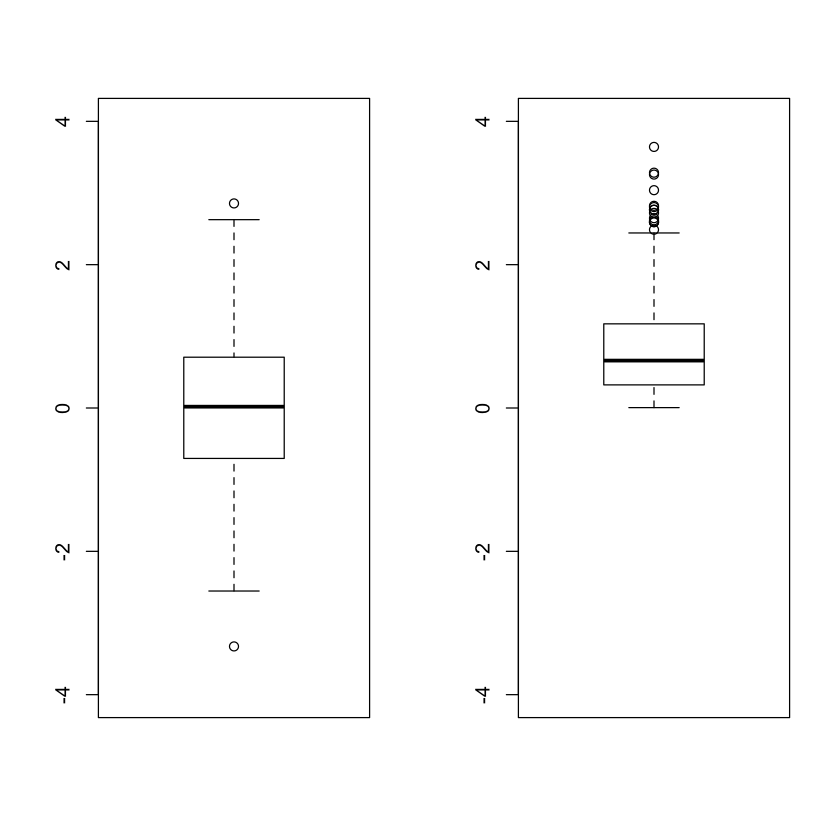

In [25]:
par(mfrow = c(1,2))
boxplot(rnumbers$rnorm1000, ylim = c(-4, 4))
boxplot(rnumbers$pos_rnorm1000, ylim = c(-4, 4))
par(mfrow = c(1,1))

A second method is to plot them with a single command so that axes are aligned:

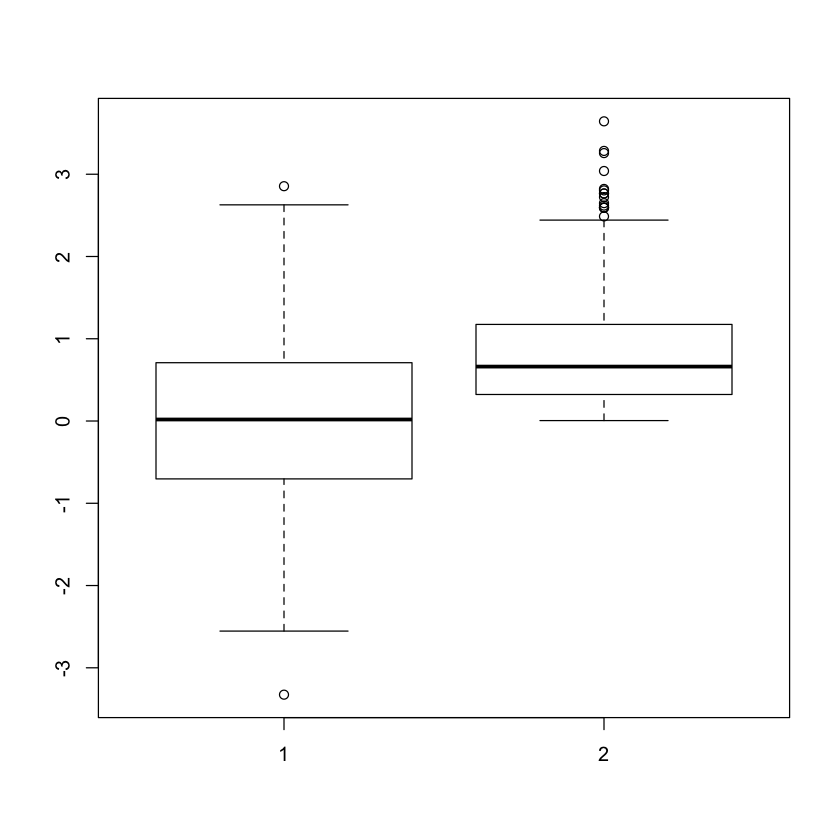

In [26]:
boxplot(rnumbers$rnorm1000, rnumbers$pos_rnorm1000)

# STRIPCHARTS

"stripchart produces one dimensional scatter plots (or dot plots) of the given data.

These plots are a good alternative to boxplots when sample sizes are small."

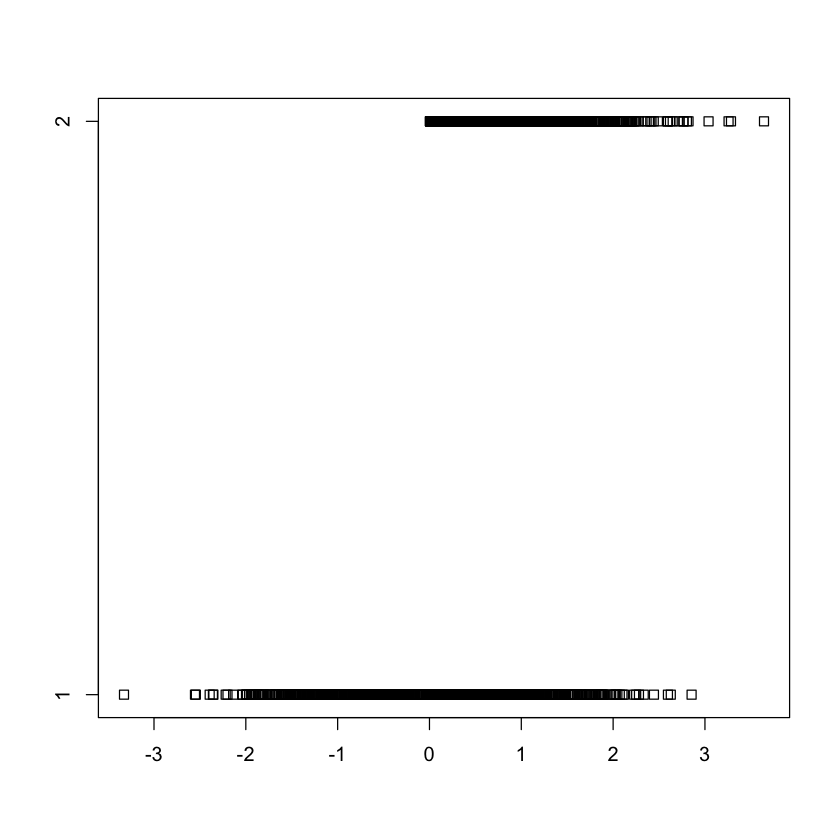

In [27]:
stripchart(list(rnumbers$rnorm1000,
               rnumbers$pos_rnorm1000))

This is done with default "overplot" method

Let's redo it with "jitter" method:

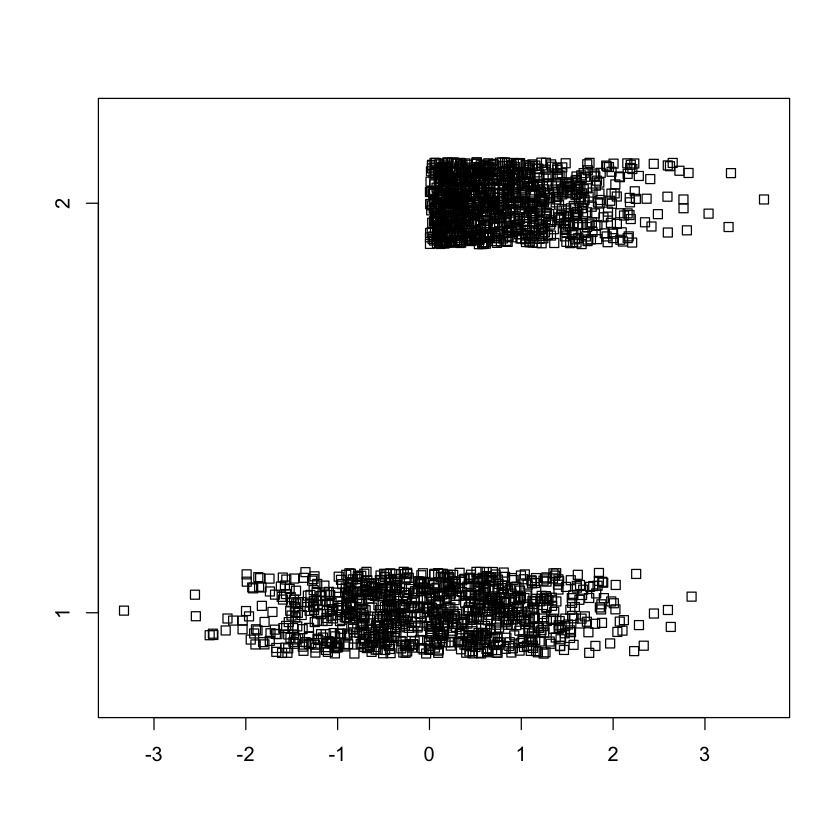

In [28]:
stripchart(list(rnumbers$rnorm1000,
               rnumbers$pos_rnorm1000),
          method = "jitter")

Now let's differentiate the colors

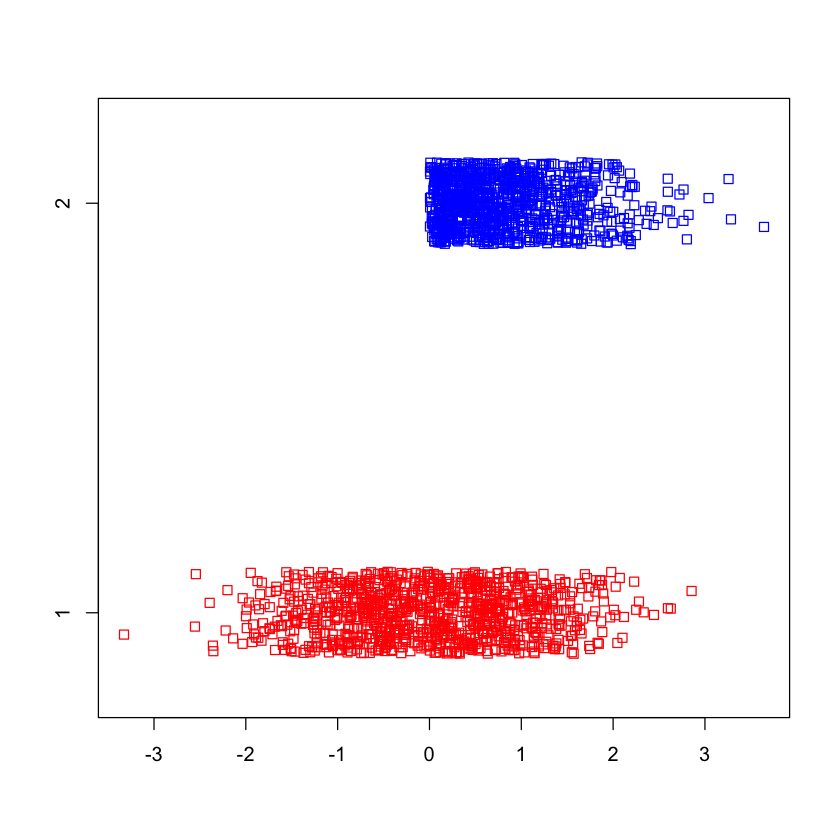

In [29]:
stripchart(list(rnumbers$rnorm1000,
               rnumbers$pos_rnorm1000),
          method = "jitter", col = c("red", "blue"))

NOW LET'S GO BACK TO WORD LIST EXAMPLE

TAKE THE SCRIPT OF STAR WARS

In [30]:
starwars_vec <- scan(
    "https://raw.githubusercontent.com/serhatcevikel/cmpe_140_public/master/starwars22",
    sep = " ",
    what = "character")
head(starwars_vec)


[1] ""        "star"    "wars"    "episode" "iv"      "a"

In [31]:
starwars_list <- split(1:length(starwars_vec), starwars_vec)[-1]
head(starwars_list)

$`&`
[1] 18567

$`15`
[1] 22

$`1976`
[1] 23

$`1977`
[1] 18795

$`2037`
[1] 9171 9225 9332

$`3po`
[1]   211 18626

In [32]:
starwars_freq <- sapply(starwars_list, length)
head(starwars_freq)

&   15 1976 1977 2037  3po 
   1    1    1    1    3    2

In [33]:
starwars_freq_dec <- sort(starwars_freq, decreasing = T)
head(starwars_freq_dec)

the    a  and   to   of luke 
1196  454  416  380  348  321

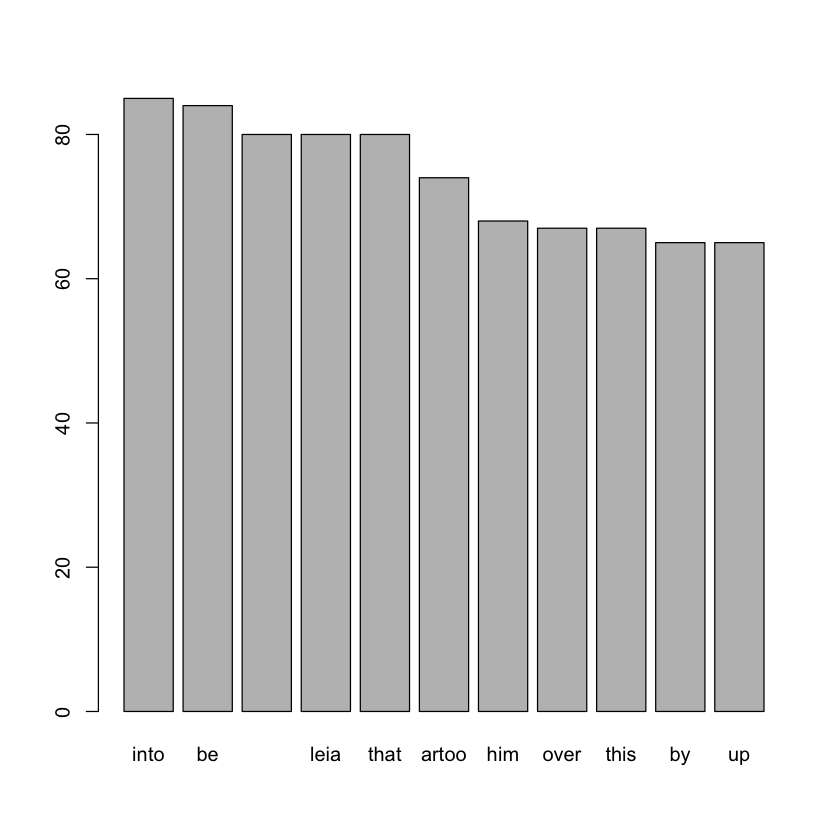

In [34]:
barplot(starwars_freq_dec[30:40])

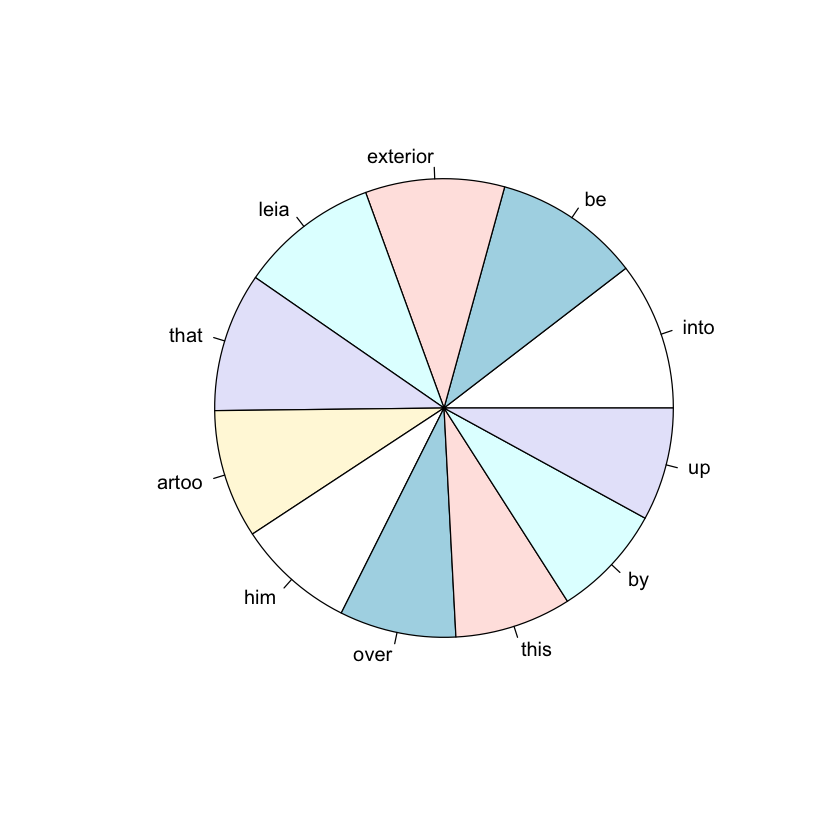

In [35]:
pie(starwars_freq_dec[30:40])